# Plots for the 2MDM analysis

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.interpolate import griddata
from itertools import product
import pyslha

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu_r']

### Load Relic Density scan 

In [2]:
relicData = np.genfromtxt('../maddm_2MDM_scan/output/scan_run_01.txt',comments='#',usecols=(1,2,3),names=['mDM','mZp','Omegah2'])

### Get Model Parameters

In [21]:
modelPars = pyslha.readSLHAFile('../maddm_2MDM_scan/Cards/param_card.dat')
gzp = modelPars.blocks['NPINPUTS'][1]
salpha = modelPars.blocks['NPINPUTS'][2]
gchi = modelPars.blocks['NPINPUTS'][3]
gqV = modelPars.blocks['NPINPUTS'][4]
gqA = modelPars.blocks['NPINPUTS'][5]
ychi = modelPars.blocks['NPINPUTS'][6]
mS = modelPars.blocks['MASS'][9900026]


textstr = '\n'.join((
    r'$m_S =$ %1.2f TeV' %(mS/1e3),
    r'$g_q^V =$ %1.2f' %gqV,
    r'$g_q^A =$ %1.2f' %gqA,
    r'$g_\chi =$ %1.2f' %gchi,
    r'$y_\chi =$ %1.2f' %ychi, 
    r'$\sin\alpha =$ %1.1f' %salpha))


### Load ATLAS curve

In [22]:
atlasCurve1 = np.array(list(zip([112.70553064275038, 178.77428998505232, 268.16143497757844, 342.0029895366218, 423.61733931240656, 509.118086696562, 563.5276532137518, 617.9372197309417, 680.1195814648729, 726.7563527653214, 788.9387144992526, 847.2346786248131, 1053.2137518684603, 1173.6920777279522, 1282.5112107623318, 1402.9895366218236, 1573.9910313901344, 1752.7653213751867, 1915.9940209267563, 2129.745889387145],[4.267425320056899, 19.203413940256045, 46.941678520625885, 72.54623044096728, 108.81934566145091, 136.55761024182075, 155.7610241820768, 174.96443812233284, 181.3655761024182, 204.83641536273115, 226.17354196301562, 258.17923186344234, 358.4637268847795, 422.47510668563297, 477.95163584637265, 535.5618776671407, 612.375533428165, 695.5903271692745, 772.4039829302986, 872.6884779516357])))
atlasCurve2 = np.array(list(zip([897.7578475336322, 862.780269058296, 823.9162929745889, 804.4843049327354, 788.9387144992526, 785.0523168908819, 804.4843049327354, 855.0074738415545, 913.3034379671151, 963.8266068759342, 1014.3497757847533, 1080.4185351270553, 1134.8281016442452, 1189.2376681614348, 1247.5336322869955, 1321.3751868460388, 1418.5351270553065],[889.7581792318633, 840.6827880512091, 793.7411095305831, 766.0028449502133, 733.9971550497866, 706.2588904694167, 684.9217638691322, 676.3869132290184, 674.25320056899, 687.0554765291606, 701.9914651493598, 725.4623044096728, 748.9331436699857, 770.2702702702702, 798.00853485064, 832.1479374110952, 872.6884779516357])))

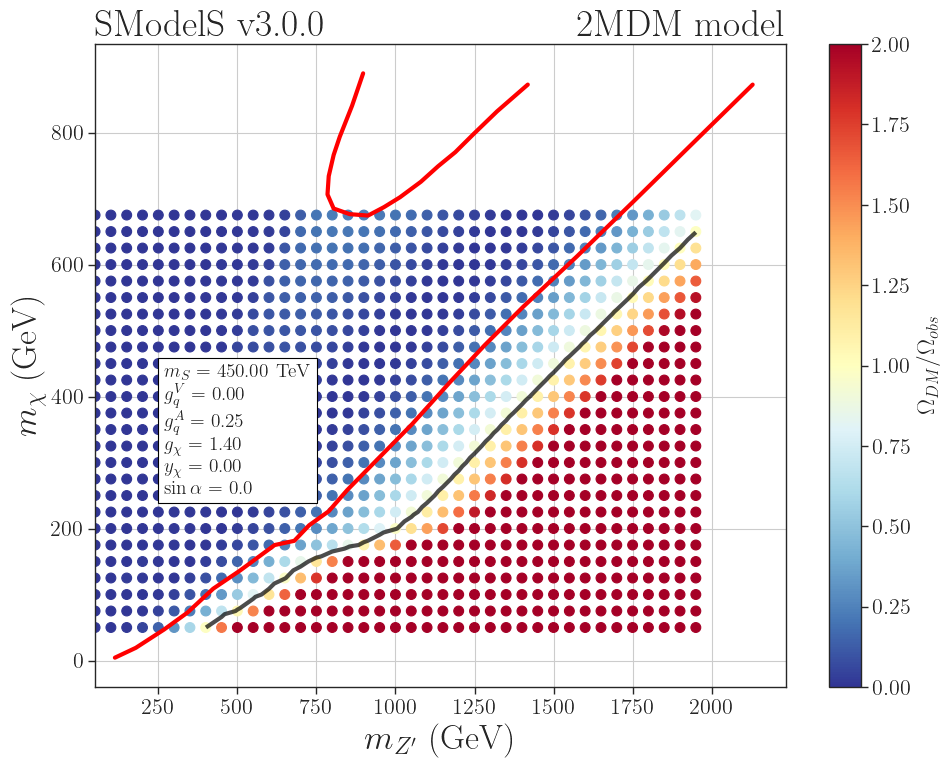

In [23]:
plt.figure(figsize=(10,8))


plt.scatter(relicData['mZp'],relicData['mDM'],c=relicData['Omegah2']/0.12,s=50,
            cmap=cm, vmin=0.0,vmax=2.0)
cb = plt.colorbar(label=r'$\Omega_{DM}/\Omega_{obs}$')

pts = np.array([y for y in product(np.unique(relicData['mZp']),np.unique(relicData['mDM']))])
rPts = griddata(list(zip(relicData['mZp'],relicData['mDM'])),relicData['Omegah2'],pts)
plt.tricontour(pts[:,0],pts[:,1], rPts, levels=[0.12], alpha=0.7,linewidths=3,colors='black')

plt.plot(atlasCurve1[:,0],atlasCurve1[:,1],color='red',linewidth=3)
plt.plot(atlasCurve2[:,0],atlasCurve2[:,1],color='red',linewidth=3)


# plt.ylim(0,1000)
# plt.xlim(0,2500)
    
plt.xlabel(r'$m_{Z^\prime}$ (GeV)', fontsize=25)
plt.ylabel(r'$m_{\chi}$ (GeV)', fontsize=25)
    
plt.title(r'SModelS v3.0.0', loc='left', fontsize=27)
plt.title(r'2MDM model', loc='right', fontsize=27)

plt.text(0.1,0.3,textstr,fontsize=14,bbox=dict(facecolor='white', edgecolor='black'),
         transform = plt.gca().transAxes)

plt.grid()
plt.tight_layout()

plt.show()